# PC Lab #4 - Group 8 - Bubu, Benedikt, Berkant

## Task #1 : Basic manipulation and descriptive statistics

 Import the Data_PCLab4_Stock_Price.csv data and the
 Data_PCLab4_Stock_Volume.csv

In [3]:
import pandas as pd

price_df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab4_Stock_Price.csv")

volume_df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab4_Stock_Volume.csv")

# Print
print(price_df.head(10))
print(volume_df.head(10))

         Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   
5  2012-01-20  60.042858  75.519997  30.510000  12.64  190.929993  188.520004   
6  2012-01-23  61.058571  75.510002  30.400000  13.14  186.089996  189.979996   
7  2012-01-24  60.058571  75.360001  30.090000  13.16  187.000000  191.929993   
8  2012-01-25  63.808571  75.820000  30.209999  13.11  187.800003  191.729996   
9  2012-01-26  63.518570  75.309998  29.450001  13.05  193.320007  190.979996   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  12

Describe the sample :
- What is the average trading volume for Apple stock?
- What is the maximum trading volume for S&P500?
- Which security is traded the most? Comment on your answer

In [13]:
# Price descriptive statistics
pd.options.display.float_format = '{:.2f}'.format

price_stats = price_df.describe()

price_stats

AAPL      BA       T     MGM    AMZN     IBM    TSLA    GOOG   sp500
count 2159.00 2159.00 2159.00 2159.00 2159.00 2159.00 2159.00 2159.00 2159.00
mean   140.82  189.94   35.16   23.11  915.67  161.85  259.60  783.71 2218.75
std     70.83  103.68    3.21    6.96  697.84   25.56  210.99  334.45  537.32
min     55.79   67.24   26.77    7.14  175.93   94.77   22.79  278.48 1278.04
25%     89.17  124.01   33.04   18.55  316.49  142.77  184.60  527.21 1847.98
50%    116.60  142.42   34.93   23.78  676.01  156.95  231.96  737.60 2106.63
75%    175.02  297.04   37.42   28.43 1593.65  185.97  307.35 1079.74 2705.81
max    455.61  440.62   43.47   38.03 3225.00  215.80 1643.00 1568.49 3386.15

In [15]:
# Volume descriptie statistics

pd.options.display.float_format = '{:.2f}'.format

volume_stats = volume_df.describe()

volume_stats

AAPL           BA            T         MGM        AMZN  \
count      2159.00      2159.00      2159.00     2159.00     2159.00   
mean   58203317.42   6419915.93  28321313.57  9845581.70  4102672.90   
std    45681411.90   9711873.15  14289105.90  7295752.64  2290722.34   
min    11362000.00    788900.00   6862400.00   950700.00   881300.00   
25%    27699300.00   3031850.00  20021500.00  5796450.00  2675700.00   
50%    42094200.00   3991000.00  24859300.00  7899800.00  3494800.00   
75%    71824800.00   5325900.00  32105650.00 11040550.00  4768150.00   
max   376530000.00 103212800.00 195082700.00 90098200.00 23856100.00   

              IBM        TSLA        GOOG         sp500  
count     2159.00     2159.00     2159.00       2159.00  
mean   4453089.53  7001302.27  2498238.26 3680732468.74  
std    2462811.45  5781207.84  1928407.25  862271696.84  
min    1193000.00   364900.00     7900.00 1248960000.00  
25%    3111250.00  3433450.00  1325400.00 3211890000.00  
50%    3825000.00  5581100.00  1813900.00 3526890000.00  
75%    4937300.00  8619550.00  3245350.00 3933290000.00  
max   30490200.00 60938800.00 24977900.00 9044690000.00

In [24]:
import matplotlib.pyplot as plt

# Creating a Plot to visualize the descriptive statitistics

# Prepare the data for plotting
stocks = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

# Stock price data
mean_price = price_stats.loc['mean', stocks]
min_price = price_stats.loc['min', stocks]
max_price = price_stats.loc['max', stocks]

# Volume data
mean_volume = volume_stats.loc['mean', stocks]
min_volume = volume_stats.loc['min', stocks]
max_volume = volume_stats.loc['max', stocks]

# Adjust the volume data to be in millions (easier to see)
mean_volume_millions = mean_volume / 1_000_000
min_volume_millions = min_volume / 1_000_000
max_volume_millions = max_volume / 1_000_000

# Visualize the data
plt.figure(figsize=(14, 6))

# Graph for Stock Prices
plt.subplot(1, 2, 1)
plt.errorbar(stocks, mean_price,
             yerr = [mean_price - min_price, max_price - mean_price],
             fmt = 'o',
             capsize = 5
)
plt.xlabel('Stocks')
plt.ylabel('Stock Price')
plt.title('Summary of Stock Prices')

# Adding labels
for i, stock in enumerate(stocks):
    plt.text(stock, mean_price[i], f'{mean_price[i]:.2f}', ha='center', va='bottom', fontsize=8)



# Error bar plot for stock volumes 
plt.subplot(1, 2, 2)
plt.errorbar(stocks, mean_volume_millions,
             yerr=[mean_volume_millions - min_volume_millions, max_volume_millions - mean_volume_millions],
             fmt = 'o',
             capsize=5
)
plt.xlabel('Stocks')
plt.ylabel('Stock Volume (in millions)')
plt.title('Summary of Stock Volume (in millions)')


# Adding labels
for i, stock in enumerate(stocks):
    plt.text(stock, mean_volume_millions[i], f'{mean_volume_millions[i]:.2f}', ha='center', va='bottom', fontsize=8)


# Show the plot
plt.tight_layout()
plt.show()

C:\Users\frien\AppData\Local\Temp\ipykernel_33440\2048875026.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock, mean_price[i], f'{mean_price[i]:.2f}', ha='center', va='bottom', fontsize=8)
C:\Users\frien\AppData\Local\Temp\ipykernel_33440\2048875026.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock, mean_volume_millions[i], f'{mean_volume_millions[i]:.2f}', ha='center', va='bottom', fontsize=8)


The graphs here shows a summary of the mean stock price/volume for each stock, market by the dot in the middle. The spread is visualized by error bars with the max stock price/volume being the cap of the error bar and the minimum as the lower error bar. Looking closely, we can see that AMZN has the highest mean price for individual stocks(915) and one of the largest ranges in stock price. Tesla also has a rather large spread indicating that the stock prices are quite volatile for these large tech firms. On the other hand, the stock prices seem to be more stable for firms like IBM, MGM, AAPL and BA.

On the other hand, S&P500 has a high trading volume as well as stock prices compared to individual stocks. AAPL has the highest trading volume (58 millions). Let us also graph the plots without S&P500 to get a more clear view of the individual stocks:

C:\Users\frien\AppData\Local\Temp\ipykernel_33440\4071211646.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock, mean_price_without_sp500[i], f'{mean_price_without_sp500[i]:.2f}', ha='center', va='bottom', fontsize=8)
C:\Users\frien\AppData\Local\Temp\ipykernel_33440\4071211646.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock, mean_volume_millions_without_sp500[i], f'{mean_volume_millions_without_sp500[i]:.2f}', ha='center', va='bottom', fontsize=8)


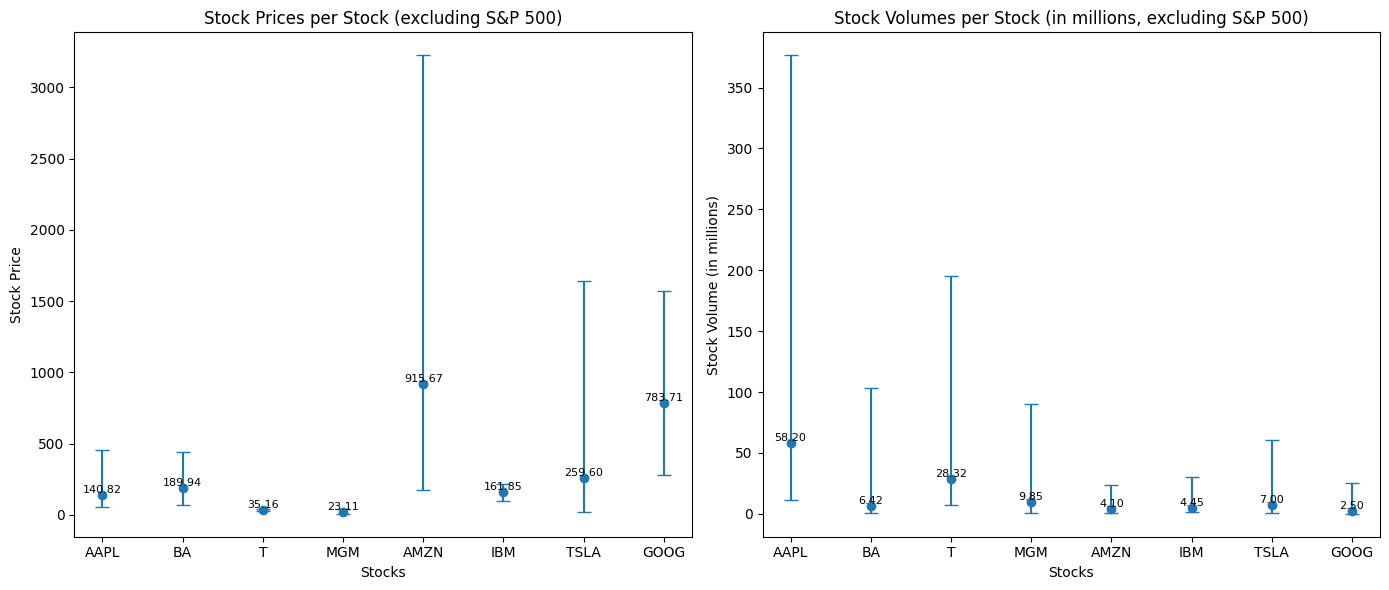

In [30]:
# Exclude 'sp500' 
stocks_no_sp500 = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

# Adjust the data to exclude S&P 500
mean_price_without_sp500 = mean_price[stocks_no_sp500]
min_price_without_sp500 = min_price[stocks_no_sp500]
max_price_without_sp500 = max_price[stocks_no_sp500]

mean_volume_millions_without_sp500 = mean_volume_millions[stocks_no_sp500]
min_volume_millions_without_sp500 = min_volume_millions[stocks_no_sp500]
max_volume_millions_without_sp500 = max_volume_millions[stocks_no_sp500]

# Visualize the data excluding S&P 500
plt.figure(figsize=(14, 6))

# Graph for Stock Prices excluding S&P 500
plt.subplot(1, 2, 1)
plt.errorbar(stocks_no_sp500, mean_price_without_sp500,
             yerr=[mean_price_without_sp500 - min_price_without_sp500, max_price_without_sp500 - mean_price_without_sp500],
             fmt='o', capsize=5)
plt.xlabel('Stocks')
plt.ylabel('Stock Price')
plt.title('Stock Prices per Stock (excluding S&P 500)')

# Add labels for mean stock prices excluding S&P 500
for i, stock in enumerate(stocks_no_sp500):
    plt.text(stock, mean_price_without_sp500[i], f'{mean_price_without_sp500[i]:.2f}', ha='center', va='bottom', fontsize=8)

# Graph for Stock Volumes in millions excluding S&P 500
plt.subplot(1, 2, 2)
plt.errorbar(stocks_no_sp500, mean_volume_millions_without_sp500,
             yerr=[mean_volume_millions_without_sp500 - min_volume_millions_without_sp500, max_volume_millions_without_sp500 - mean_volume_millions_without_sp500],
             fmt='o', capsize=5)
plt.xlabel('Stocks')
plt.ylabel('Stock Volume (in millions)')
plt.title('Stock Volumes per Stock (in millions, excluding S&P 500)')

# Add labels for mean stock volumes in millions excluding S&P 500
for i, stock in enumerate(stocks_no_sp500):
    plt.text(stock, mean_volume_millions_without_sp500[i], f'{mean_volume_millions_without_sp500[i]:.2f}', ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

ere we can clearly see that Apple dominates in stock volume. Based on the spread there seems to be a few very large 

H

In [28]:
# What is the average trading volume for Apple stock
AAPL_volume = mean_volume_millions['AAPL']
print(f'Average Trading Volume for the Apple Stock: {AAPL_volume:.2f} million')

# What is the maximum trading volume for S&P500?
SP500_max_volume = max_volume_millions['sp500']
print(f'Maximum Trading Volume for the S&P500: {SP500_max_volume:.2f} million' )


Average Trading Volume for the Apple Stock: 58.20 million
Maximum Trading Volume for the S&P500: 9044.69 million


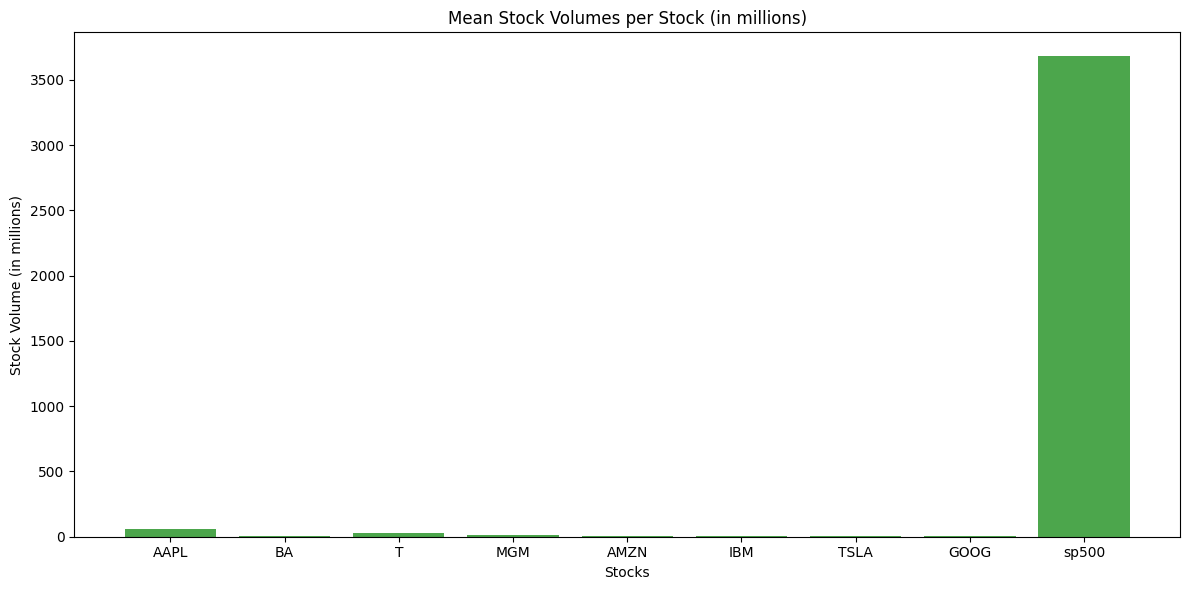

In [29]:
# Which security is traded the most? Comment on your answer



# Bar chart for mean stock volumes in millions
plt.figure(figsize=(12, 6))
plt.bar(stocks, mean_volume_millions, color='green', alpha=0.7)
plt.xlabel('Stocks')
plt.ylabel('Stock Volume (in millions)')
plt.title('Mean Stock Volumes per Stock (in millions)')

# Show the plot
plt.tight_layout()
plt.show()

Create a graph from these. (include mode) + comment

Plot the time series of volumes for all stocks (raw and normalized)

Is there a correlation between change in prices (returns) and change in volumes?
- first comment on the correlation by plotting prices vs volumes
- then calculate the correlation matrix

## Task #2 : Train and Test samples + Ridge regression

Concatenate the date, stock price, and volume in one dataframe

 Tip : scale the data
 from sklearn.preprocessing import MinMaxScaler
 sc = MinMaxScaler(feature_range = (0, 1))
 training_set_scaled = sc.fit_transform(training_data)

 You want to predict stock prices (or returns) at t+1 using stock prices (returns)
 and volumes at t
 Pi,t+1 = f(Pi,t,Vi,t)
 - Split the sample : 75% training, 25% testing
- Create and train i) an OLS model and ii) Ridge linear regression model (and play
 with the penalty parameter)
- What is the ROOS of the 2 methods? Use the formula from Gu et al. (2020)
 (eq. 19, p. 2246)
 Ri,OOS = 1− t∈T
 (ri,t − ˆ ri,t)2
 t∈T
 (ri,t)2
- Alternative measures: number of time the predicted return and the realized
 return have the same sign (or MSE, R-square)

 For Apple, you may be able to plot similar result :

## Task #3 : Same but with NN or Trees

- Pick one (or several) machine learning model: e.g., NN with many layers
- Same steps as Task #2
- Comment 1: which method performs the best? Is it in line with Gu et al.,
 (2020). Can we really compare?
- Comment 2: What about Jiang et al. (2023) paper?

Remember alternative measures, R2, MSE etc. 
- note if you do trees remember to look for assumptions
- maybe test random trees/bagging/boost/XGBoost


## Optional Task #4 : Performance of the AI-driven portfolio

 Create a long portfolio by selecting every day the 4 assets with the highest
 predicted return at t+1 (i.e., you re-balance every day). You initially invest 100$,
 how much do you have at the end of the testing period?

Compare your result to 1000 portfolios with random weights (you generate the
 weights at the beginning of the testing period and you never re-balance your
 portfolio).

 Imagine that you now pay trading fees : 3% of the amount invested is charged
 for every transaction, what is the new performance of your AI-driven portfolio?

– You want to sell 50$ of stock A to buy the same amount of stock B, you will be
 charged 1.5$, so you’ll end up with only 48.5$ invested in stock B.